# Titanic Kaggle competition

Titanic datasets come from https://www.kaggle.com/c/titanic and is the most popular open kaggle competition.

It is my first real data set to practice data science skills. 

The work is done in jupyter and comes in stages:
1. Import and clean the data
2. feuture engineering to obtain new columns
3. basic statistics to recognize trends in data


Firstly I create environment by importing all neccesary packages.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime as dt

I saved files from website locally and read it from there. 

In [16]:
dir = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\data\\'
train = dir + 'train.csv'
test = dir + 'test.csv'

train_data = pd.read_csv(train)
test_data = pd.read_csv(test)


## Kaggle Data description

In [32]:
pd.read_clipboard()

,dir,=,'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\data\\'


In [4]:
train_data.head(10)
#train_data.shape
#train_data.isnull().sum()
#train_data.dtypes
#train_data.PassengerId.is_unique
#train_data.groupby('Survived')['PassengerId'].count()
#train_data.groupby('Pclass')['PassengerId'].count()
#train_data.groupby('Sex')['PassengerId'].count()
#train_data.Age.describe(); train_data.sort_values('Age')
#train_data.groupby('SibSp')['PassengerId'].count()
#train_data.groupby('Parch')['PassengerId'].count()
#train_data.Fare.describe()
#train_data.groupby(['Pclass', 'Cabin'])['PassengerId'].count()
#train_data.groupby(['Embarked', 'Pclass'])['PassengerId'].count()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Test Data:
	1. 11 columns; 418 observations (Passengers)
	2. Each row is set to be different passenger.
	3. Null values: Age (86), Cabin (327), Fare (1)

In [34]:
test_data.head(10)
#test_data.shape
#test_data.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Analyze Train set to test intuitive thoughts:
But furst let's check the amount of nulls
	1. Pclass has influence over Survived rate
	2. Sex --||--
	3. No of siblings --||--
	4. No of Parch --||--

In [35]:
print('-'*10, 'Number of Null Values for each dataset', '-'*10)
null_values = pd.concat([train_data.drop('Survived', axis=1).isnull().sum(), test_data.isnull().sum()], axis=1, keys=['Train', 'Test'])
null_values.query('Train !=0 | Test != 0')

---------- Number of Null Values for each dataset ----------


,Train,Test
Age,177,86
Fare,0,1
Cabin,687,327
Embarked,2,0


In [36]:
print('-'*10, 'Survival Rate per class', '-'*10)
train_data.groupby('Pclass')['Survived'].mean()

---------- Survival Rate per class ----------


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [37]:
print('-'*10, 'Survival Rate per Gender', '-'*10)
train_data.groupby('Sex')['Survived'].mean()

---------- Survival Rate per Gender ----------


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [38]:
print('-'*10, 'Survival Rate per No of Siblings/Spouse', '-'*10)
train_data.groupby('SibSp')['Survived'].mean()

---------- Survival Rate per No of Siblings/Spouse ----------


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [39]:
print('-'*10, 'Survival Rate per No of Parents/Children', '-'*10)
train_data.groupby('Parch')['Survived'].mean()

---------- Survival Rate per No of Parents/Children ----------


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [40]:
print('-'*10, 'Survival Rate per No of Embarked Port', '-'*10)
train_data.groupby('Embarked')['Survived'].mean()

---------- Survival Rate per No of Embarked Port ----------


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

## Clean Train and Test databases:
###	1. Fill Na:
	* Age = by calculating typical age range(mean +/- std) of this Sex and PClass as Higher class had much higher Age
	* Embarked = by the most common Embarked location
	* Fare = by median Fare value
	* Cabin will converted to boolean by feature engineering

In [17]:
print('-'*10, 'Start train_data.Age filling', '-'*10)
age_stat = train_data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'std'])

age_stat['start'] = age_stat['mean'] - age_stat['std']
age_stat['end'] = age_stat['mean'] + age_stat['std']
age_stat.drop(['mean', 'std'], axis=1, inplace=True)

train_data = pd.merge(train_data, age_stat, how='left', left_on=['Sex', 'Pclass'], right_index=True)
train_data['Age2'] = train_data.apply(lambda x: np.random.randint(x.start, x.end), axis=1)
train_data.Age.fillna(train_data.Age2, inplace=True)
train_data.drop(['start', 'end', 'Age2'], axis=1, inplace=True)

if train_data.Age.isnull().sum() == 0:
    print('-'*10, 'Cleaning train_data.Age complete', '-'*10)
else:
    print('-'*10, 'Cleaning train_data.Age complete but there are still Null values', '-'*10)
    print('Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M")))

---------- Start train_data.Age filling ----------
----------

 Cleaning train_data.Age complete ----------


In [18]:
print('-'*10, 'Start test_data.Age filling', '-'*10)
age_stat = test_data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'std'])

age_stat['start'] = age_stat['mean'] - age_stat['std']
age_stat['end'] = age_stat['mean'] + age_stat['std']
age_stat.drop(['mean', 'std'], axis=1, inplace=True)

test_data = pd.merge(test_data, age_stat, how='left', left_on=['Sex', 'Pclass'], right_index=True)
test_data['Age2'] = test_data.apply(lambda x: np.random.randint(x.start, x.end), axis=1)
test_data.Age.fillna(test_data.Age2, inplace=True)
test_data.drop(['start', 'end', 'Age2'], axis=1, inplace=True)

if test_data.Age.isnull().sum() == 0:
    print('-'*10, 'Cleaning test_data.Age complete', '-'*10)
    print('Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M")))
else:
    print('-'*10, 'Cleaning test_data.Age complete but there are still Null values', '-'*10)


---------- Start test_data.Age filling ----------
---------- Cleaning test_data.Age complete ----------
Execution date: May 03, 2018  17:45.


In [19]:
print('-'*10, 'Cleaning train.Embarkment', '-'*10)
train_data.Embarked.fillna(train_data.Embarked.mode()[0], inplace=True)
if train_data.Embarked.isnull().sum() == 0:
    print('-'*10, 'Cleaning train_data.Embarked complete', '-'*10)
    print('Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M")))
else:
    print('-'*10, 'Cleaning train_data.Embarked complete but there are still Null values', '-'*10)


---------- Cleaning train.Embarkment ----------
---------- Cleaning train_data.Embarked complete ----------
Execution date: May 03, 2018  17:45.


In [20]:
print('-'*10, 'Cleaning test_data.Fare', '-'*10)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)
if test_data.Fare.isnull().sum() == 0:
    print('-'*10, 'Cleaning test_data.Fare complete', '-'*10)
    print('Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M")))
else:
    print('-'*10, 'Cleaning test_data.Fare complete but there are still Null values', '-'*10)


---------- Cleaning test_data.Fare ----------
---------- Cleaning test_data.Fare complete ----------
Execution date: May 03, 2018  17:45.


## Plot data for betten understanding
#### In order to make prediction of survival Rate we need to first observe trends in data. In order to do it, I will plot the Survived and not Survived Passengers by Age, Class and Gender. 


### Histogram Analysis
1. First Histogram of Age, supports my feeling that older passengers had slightly lower Survival Rate than younger. However, it needs further analysis of other variables.
* When we look at each passenger class separatly, it further shows that the age of passengers where determinant in each class.
* When we look at each passenger gender separatly, we don't see any that would mean that e.g. younger women are more likely to be survive than older. 
#### Summary
If we are looking separatly at distrbutions of those who survived and didn't we don't see very clear trends, but the fact that younger memberts in each class and gender weremore likely to survive

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


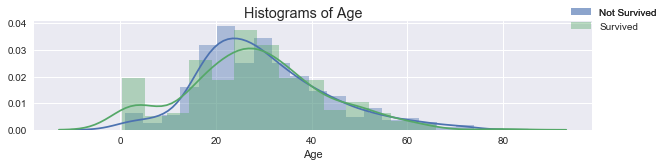

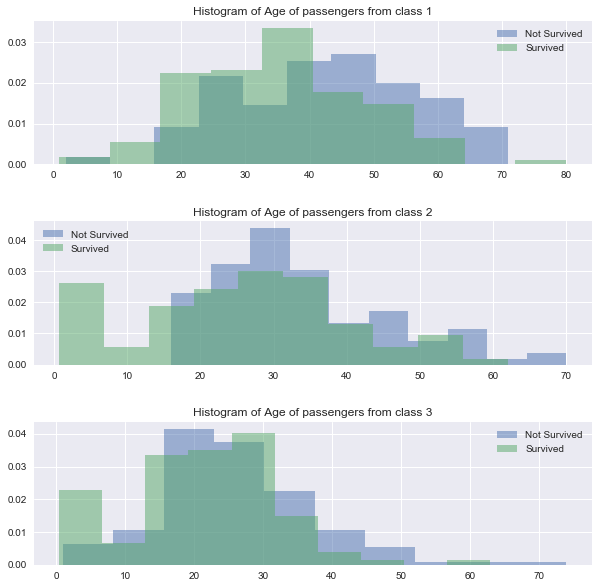

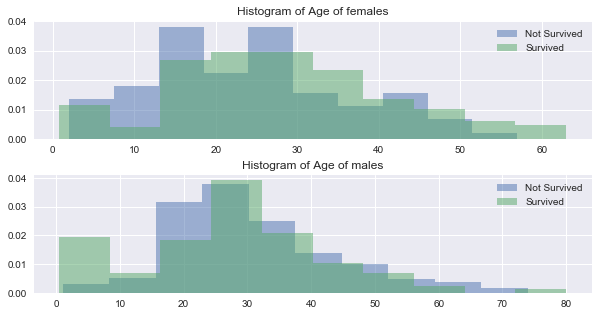

In [17]:
# Initial settings
sns.set()
survived_func = lambda x: 'Survived' if x==1 else 'Not Survived'
gender_func = lambda x: 0 if x == 'female' else 1

# 1 hist
fig = plt.figure(figsize=(10, 2))
ax = plt.axes()
for survived in range(2):
    fig = sns.distplot(train_data.query('Survived == @survived')['Age'], label=survived_func(survived))
    fig.figure.suptitle('Histograms of Age')
    fig.figure.legend()
    
# 2 hist: Age per Class
'-'* 50
fig, ax = plt.subplots(3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4)
for pclass in range(3):
    for survived in range(2):
        ax[pclass].hist(train_data.query('Survived == @survived & Pclass == @pclass + 1')['Age'], 
                        alpha=0.5, histtype='stepfilled', label=survived_func(survived), density=True)
        ax[pclass].legend()
        ax[pclass].set(title='Histogram of Age of passengers from class {0}'.format(pclass + 1))

# 3 hist: Age per Gender
'-'* 50
fig, ax = plt.subplots(2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.3)
for gender in ['female', 'male']:
    for survived in range(2):
        ax[gender_func(gender)].hist(train_data.query('Survived == @survived & Sex == @gender')['Age'], 
                        alpha=0.5, histtype='stepfilled', label=survived_func(survived), density=True)
        ax[gender_func(gender)].legend()
        ax[gender_func(gender)].set(title='Histogram of Age of {0}s'.format(gender))


### Histogram Analysis #2
While density functions didn't give a clear view into the relationships between Age and Survival of different groups of passengers, when we look at the passenger count per those categories we can see more patterns. 

**Insights**
1. Women from 1st n 2nd class has survived in majority - this will be big determent in predicting model
* Men from 1st class had survived more likely when young
* Men from 2nd class had almost didn't survive
* Men from 3rd class had almost didn't survive

Also, it would be good to see if males in class first and second If they have something in common 

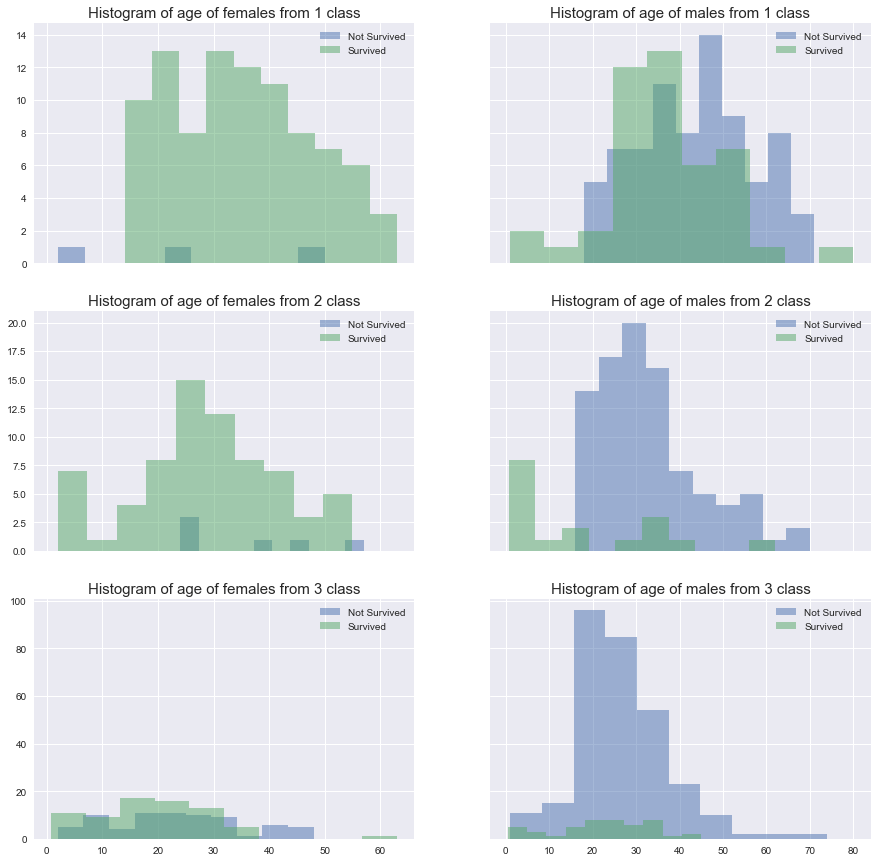

In [86]:
survived_func = lambda x: 'Survived' if x==1 else 'Not Survived'
gender_func = lambda x: 0 if x == 'female' else 1

fig, ax = plt.subplots(3, 2,figsize=(15, 15), sharex='col', sharey='row')

for pclass in range(3):
    for gender in ['female', 'male']:
        for survived in range(2):
            ax[pclass, gender_func(gender)].hist(train_data.query('Survived == @survived & Sex == @gender & Pclass == @pclass + 1')['Age'],
                                                 alpha=0.5, histtype='stepfilled', label=survived_func(survived))#, density=True)
            ax[pclass, gender_func(gender)].legend()
            ax[pclass, gender_func(gender)].set_title('Histogram of age of {0}s from {1} class'.format(gender, pclass + 1), fontsize=15)

#### Histogram Analysis #3
This time I will use Seaborn function for drawing many histograms at once


C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


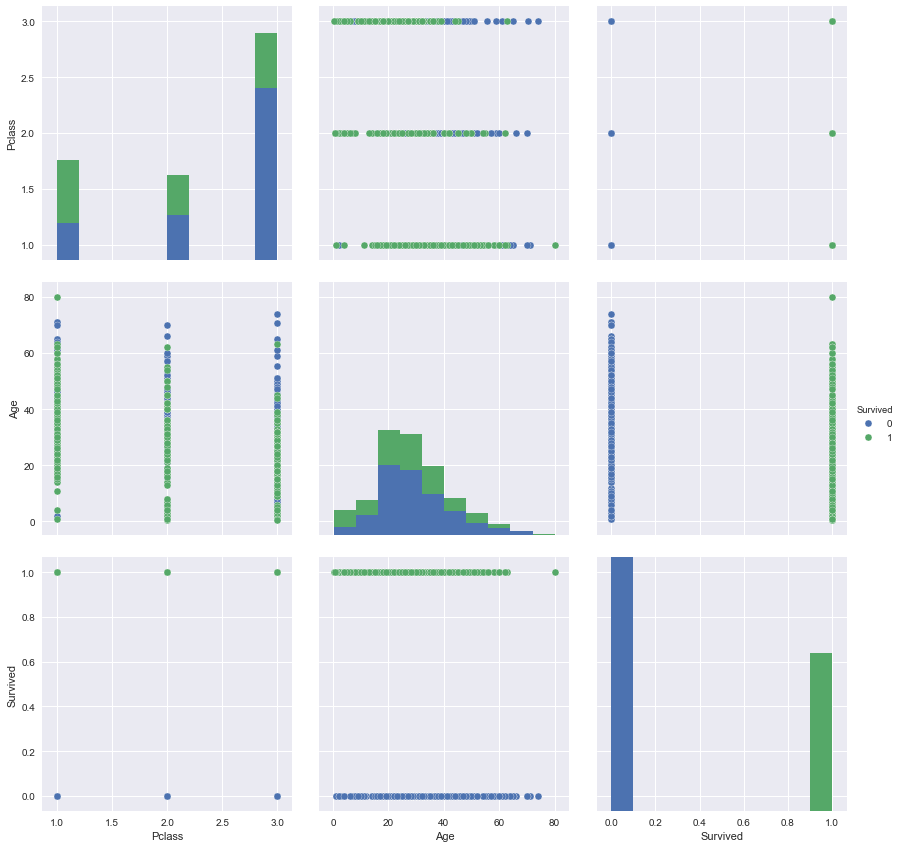

In [88]:
sns.set()
train_subset = train_data.loc[:, ['Pclass', 'Sex', 'Age', 'Survived']] 
train_subset[train_subset.Sex == 'female']['Sex'] = 1
train_subset[train_subset.Sex == 'male']['Sex'] = 0

sns.pairplot(train_subset, hue='Survived', size=4)


### PIE CHARTS
The Summary of above approach and findings can be seen in pie charts below.


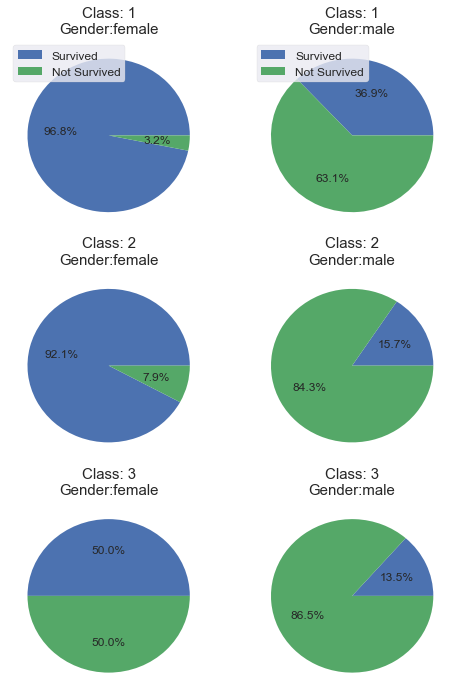

In [89]:
survived = train_data.groupby('Pclass')['Survived'].mean()[1]
gender_func = lambda x: 0 if x == 'female' else 1

fig = plt.figure(figsize=(8, 12))
grid = plt.GridSpec(3, 2, hspace=0.2, wspace=0.2)
labels = ['Survived', 'Not Survived']
for pclass in range(3):
    for gender in ['female', 'male']:
        pie = fig.add_subplot(grid[pclass, gender_func(gender)])
        survived = train_data.query('Pclass == @pclass + 1 & Sex == @gender')['Survived'].mean()
        patches, texts, autotexts = pie.pie([survived, 1 - survived], autopct='%1.1f%%')
        pie.set_title('Class: {0}\nGender:{1}'.format(pclass+1, gender), fontsize=15)
        for t in texts:
            t.set_fontsize(12)
        for t in autotexts:
            t.set_fontsize(12)
        if pclass == 0 : pie.legend(patches, labels, loc='upper left', fontsize='medium', frameon=True)
          
#fig.suptitle('Survival Rate per category', fontsize=20, fontweight='bold', horizontalalignment='right')

### Scatter Plot
While the data is discrete (so htis method is not really appropriate), for the purpose of learning I will try to create a scatter plot with different colors of Survived and Not Survived passengers based on Class, Sex and Age.

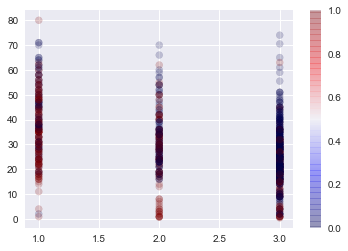

In [90]:
# Prepare data
train_subset = train_data.loc[:, ['Survived', 'Pclass', 'Sex', 'Age']]
plt.scatter(train_subset['Pclass'], train_subset['Age'], alpha=0.2, c=train_subset['Survived'], cmap='seismic')
plt.colorbar()

## Enigneer new features:
1. Build a bool if passenger had a cabin
* Change Embarked to be a int
* Change Sex to be int
* Create Title from Name column
* IsAlone column has been created
* Delete Ticket and Fare columns

In [21]:
train_data['isCabin'] = train_data.Cabin.apply(lambda x: 1 if pd.isnull(x) == False else 0)
train_data.drop('Cabin', axis=1, inplace=True)

test_data['isCabin'] = test_data.Cabin.apply(lambda x: 1 if pd.isnull(x) == False else 0)
test_data.drop('Cabin', axis=1, inplace=True)

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [22]:
def emb_int(x):
    if x == 'C':
        return 3
    elif x == 'Q':
        return 2
    elif x == 'S':
        return 1
    else:
        return 0

train_data['Embarked'] = train_data.Embarked.apply(emb_int)
test_data['Embarked'] = test_data.Embarked.apply(emb_int)

Embarked_rep = {3: 'C', 2: 'Q', 1: 'S', 0: 'other'}
'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [23]:
train_data['Sex'] = train_data.Sex.apply(lambda x: 1 if x == 'female' else 0)
test_data['Sex'] = test_data.Sex.apply(lambda x: 1 if x == 'female' else 0)

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [24]:
def Name_int(x):
    if 'Mr' in x or 'Master' in x:
        return 1
    elif 'Mrs' in x:
        return 2
    elif 'Miss' in x:
        return 3
    elif 'Rev' in x or 'Dr' in x or 'Capt' in x or 'Major' in x or 'Don' in x:
        return 0
    else:
        return 0

train_data['Title'] = train_data.Name.apply(Name_int)
train_data.drop('Name', axis=1, inplace=True)
test_data['Title'] = test_data.Name.apply(Name_int)
test_data.drop('Name', axis=1, inplace=True)

#Title_rep = {3: 'Miss', 2: 'Mrs', 1: ['Mr', 'Master', 'Rev', 'Dr', 'Capt', 'Major', 'Don'], 0: 'Other'}
'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [25]:
train_data.drop('Ticket', axis=1, inplace=True)
train_data.drop('Fare', axis=1, inplace=True)

test_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Fare', axis=1, inplace=True)

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [26]:
train_data['isAlone'] = train_data.apply(lambda x: 1 if x.SibSp == 0 and x.Parch == 0 else 0, axis=1)
test_data['isAlone'] = test_data.apply(lambda x: 1 if x.SibSp == 0 and x.Parch == 0 else 0, axis=1)

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [27]:
train_data['AgeBuckets'], bins = pd.cut(train_data.Age, 6, labels=[1, 2, 3, 4, 5, 6], retbins=True)
test_data['AgeBuckets'] = pd.cut(test_data.Age, bins=bins, labels=[1, 2, 3, 4, 5, 6])
AgeBuckets = {1: [bins[0], bins[1]], 2: [bins[1], bins[2]], 3: [bins[2], bins[3]], 4: [bins[3], bins[4]], 5: [bins[4], bins[5]], 6: [bins[5], bins[6]]}
train_data.drop('Age', axis=1, inplace=True)
test_data.drop('Age', axis=1, inplace=True)

# Fill nulls
test_data.AgeBuckets.fillna(6, inplace=True)

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [28]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

In [29]:
train_data.drop('PassengerId', axis=1, inplace=True)
#test_data.drop('PassengerId', axis=1, inplace=True)

'Execution date: {0}.'.format(dt.now().strftime("%B %d, %Y  %H:%M"))

'Execution date: May 03, 2018  17:45.'

## Advance analysis


In [100]:
train_data.groupby(['Sex', 'Title', 'Pclass'])['Survived'].describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Title</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">0</th>
      <th>0</th>
      <th>1</th>
      <td>3.0</td>
      <td>0.333333</td>
      <td>0.577350</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.5</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>119.0</td>
      <td>0.369748</td>
      <td>0.484778</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>108.0</td>
      <td>0.157407</td>
      <td>0.365882</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>347.0</td>
      <td>0.135447</td>
      <td>0.342694</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>3.0</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>45.0</td>
      <td>0.977778</td>
      <td>0.149071</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>43.0</td>
      <td>0.883721</td>
      <td>0.324353</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>43.0</td>
      <td>0.511628</td>
      <td>0.505781</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">3</th>
      <th>1</th>
      <td>46.0</td>
      <td>0.956522</td>
      <td>0.206185</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>32.0</td>
      <td>0.968750</td>
      <td>0.176777</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>101.0</td>
      <td>0.495050</td>
      <td>0.502469</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

In [101]:
train_data.pivot_table('Survived', index=['Sex', 'Pclass'], columns='FamilySize', margins=True)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>FamilySize</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>10</th>
      <th>All</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">0</th>
      <th>1</th>
      <td>0.333333</td>
      <td>0.387097</td>
      <td>0.454545</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>0.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.368852</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.097222</td>
      <td>0.066667</td>
      <td>0.470588</td>
      <td>0.250000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.157407</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.121212</td>
      <td>0.178571</td>
      <td>0.320000</td>
      <td>0.333333</td>
      <td>0.0</td>
      <td>0.000000</td>
      <td>0.250000</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.135447</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>0.970588</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>0.500000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.968085</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.906250</td>
      <td>0.894737</td>
      <td>0.928571</td>
      <td>1.000000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.921053</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.616667</td>
      <td>0.517241</td>
      <td>0.545455</td>
      <td>0.833333</td>
      <td>0.0</td>
      <td>0.000000</td>
      <td>0.375000</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.500000</td>
    </tr>
    <tr>
      <th>All</th>
      <th></th>
      <td>0.303538</td>
      <td>0.552795</td>
      <td>0.578431</td>
      <td>0.724138</td>
      <td>0.2</td>
      <td>0.136364</td>
      <td>0.333333</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.383838</td>
    </tr>
  </tbody>
</table>
</div>

In [102]:
train_data.pivot_table('Survived', index=['Sex', 'Pclass'], columns='FamilySize', aggfunc='count', margins=True)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>FamilySize</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>10</th>
      <th>All</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">0</th>
      <th>1</th>
      <td>75.0</td>
      <td>31.0</td>
      <td>11.0</td>
      <td>3.0</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>122</td>
    </tr>
    <tr>
      <th>2</th>
      <td>72.0</td>
      <td>15.0</td>
      <td>17.0</td>
      <td>4.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>108</td>
    </tr>
    <tr>
      <th>3</th>
      <td>264.0</td>
      <td>28.0</td>
      <td>25.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>12.0</td>
      <td>4.0</td>
      <td>4.0</td>
      <td>4.0</td>
      <td>347</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>34.0</td>
      <td>39.0</td>
      <td>13.0</td>
      <td>4.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>94</td>
    </tr>
    <tr>
      <th>2</th>
      <td>32.0</td>
      <td>19.0</td>
      <td>14.0</td>
      <td>9.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>76</td>
    </tr>
    <tr>
      <th>3</th>
      <td>60.0</td>
      <td>29.0</td>
      <td>22.0</td>
      <td>6.0</td>
      <td>9.0</td>
      <td>5.0</td>
      <td>8.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>144</td>
    </tr>
    <tr>
      <th>All</th>
      <th></th>
      <td>537.0</td>
      <td>161.0</td>
      <td>102.0</td>
      <td>29.0</td>
      <td>15.0</td>
      <td>22.0</td>
      <td>12.0</td>
      <td>6.0</td>
      <td>7.0</td>
      <td>891</td>
    </tr>
  </tbody>
</table>
</div>

--------------------------------------
## PREDICTING SURVIVAL
-------------------------------------

### Accuracy Validation
By below function I am splitting train set into two groups, run particular model on both groups and validate them on known data. This way will give me a general idea of performance of my model compare to others (especially regarding the same machine learning technique).

In [30]:
# BUILDING TESTING ROUTINE
# SPLIT THE DATA 50% 
def test_model(model_name):
    from sklearn.cross_validation import train_test_split
    X1, X2, y1, y2 = train_test_split(train_set.drop('Survived', axis=1), 
                                      train_set['Survived'],
                                      random_state=0,
                                      train_size=0.5)
    # RUN MODEL PREDICTION
    y2_model = model_name.fit(X1, y1).predict(X2)
    y1_model = model_name.fit(X2, y2).predict(X1)
    
    # CHECK ACCURACY
    from sklearn.metrics import accuracy_score
    print('Average accuracy of 2 sets is {:.2f}\n'.format(np.mean((accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)))))
    
    # SHOW CONFUSION MATRIX
    from sklearn.metrics import confusion_matrix
    mat = confusion_matrix(y2_model, y2)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=['Survived', 'Not Survived'], yticklabels=['Survived', 'Not Survived'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')

Dummies generator is a function that creates dummy columns for a set of columns input by argument

In [31]:
def one_hot(temp, categorical):
    # temp is the data frame from which the "categorical" columns need to be One hot encoded
    from sklearn.preprocessing import OneHotEncoder
    enc_model = OneHotEncoder(sparse=False)
    X = enc_model.fit_transform(temp[categorical])
    uniq_vals = temp[categorical].apply(lambda x: x.value_counts()).unstack()
    uniq_vals = uniq_vals[~uniq_vals.isnull()]
    enc_cols = list(uniq_vals.index.map('{0[0]}_{0[1]}'.format)) # https://stackoverflow.com/questions/41987743/merge-two-multiindex-levels-into-one-in-pandas
    enc_df = pd.DataFrame(X, columns=enc_cols, index=temp.index, dtype='bool')

    return(enc_df)

def dummies_generator(column_list):
    train_vec = train_data[column_list]
    test_vec = test_data[column_list]
    categorical = train_vec.columns
    train_vec = one_hot(train_vec, categorical)
    test_vec = one_hot(test_vec, categorical)
    # make sure that the same columns are in returned vector
    columns = list(set(train_vec.columns).intersection(test_vec.columns))      
    train_set = pd.concat((train_data['Survived'], train_vec.loc[:, columns]), axis=1)
    test_set = test_vec.loc[:, columns]
    return train_set, test_set


In [32]:
# EXPORT DATA TO FILE IN RIGHT FORMAT + validate 
def export_prediction(model, model_name):
    # build function to save model name as string
    import inspect
    def retrieve_name(var):
        callers_local_vars = inspect.currentframe().f_back.f_locals.items()
        return [var_name for var_name, var_val in callers_local_vars if var_val is var]    
    # to the actual export
    dir = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions\\'
    export_data = pd.concat((test_data['PassengerId'], pd.Series(model, name='Survived')), axis=1)
    export_data.to_csv(dir + str(model_name) + '.csv', index=False)

### Gaussian Naive Bayes
The biggest assumption of this method is independence of variables therefore using previous analysis we will see which coulmns are highly corelated to those that we predicted to have gighest influence on survival rate (Pclass, Title, AgeBuckets). It turns out only isCarbin is highly correlated Pclass and Sex with Title and isAlone. SibSp is highly correlatd with Parch therefore we will choose one of them: Parch. Embarked is correlated with Pclass but 16% we will leave. Therefore the features we will leave in the model are: Pclass, Parch, Embarked, Sex. 

Bets Result of this approach: 
**0.74641** - for 'Pclass', 'Parch', 'Embarked', 'Sex' as features

--------------------------------------------------------------
Becuase Sex, Embarkment, Pclass and Parch are categorical features, I tried to convert it 01 columns. 

Best Result of this approach: 
**0.76555** - for 'Pclass' and 'Sex' as categorical features and Parch as int

In [103]:
train_data.corr()
train_data.loc[:, ['Pclass', 'Parch', 'Embarked', 'Title']].corr()

,Pclass,Parch,Embarked,Title
Pclass,1.000000,0.018443,-0.162098,0.012711
Parch,0.018443,1.000000,-0.039798,0.113607
Embarked,-0.162098,-0.039798,1.000000,0.082845
Title,0.012711,0.113607,0.082845,1.000000


In [20]:
# BUILD MODEL SET UP
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Average accuracy of 2 sets is 0.78



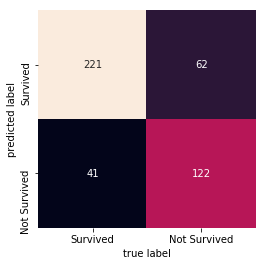

In [21]:
# BUILD MODEL
columns = ['Pclass', 'Parch', 'Embarked', 'Sex']

train_set = train_data[['Survived'] + columns]
test_set = test_data.loc[:, ['Pclass', 'Parch', 'Embarked', 'Sex']]
model.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
model_GaussianNB = model.predict(test_set)
test_model(model)
export_prediction(model)

0.7056179775280899 0.7040358744394619


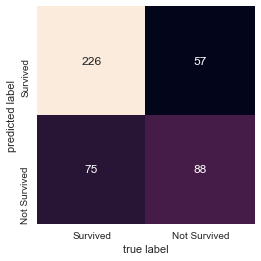

In [266]:
# BUILD MODEL2
train_set = train_data.loc[:, ['Survived', 'Pclass', 'Parch', 'Embarked', 'Title']]
test_set = test_data.loc[:, ['Pclass', 'Parch', 'Embarked', 'Title']]
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
model_GaussianNB1 = model1.predict(test_set)
test_model(model1)

0.7258426966292135 0.6973094170403588


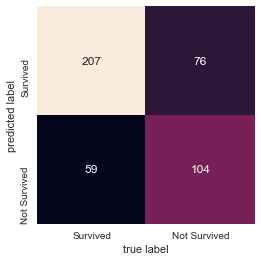

In [267]:
# BUILD MODEL WITH ONLY TWO
train_set = train_data.loc[:, ['Survived', 'Pclass', 'Title']].copy()
test_set = test_data.loc[:, ['Pclass', 'Title']].copy()
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
model2_GaussianNB = model2.predict(test_set)
test_model(model2)

0.7303370786516854 0.7107623318385651


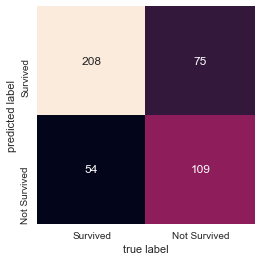

In [274]:
# BUILD MODEL WITH MORE VARIABLES
train_set = train_data.loc[:, ['Survived', 'Pclass', 'Parch', 'Embarked', 'Title', 'AgeBuckets', 'isAlone', 'isCabin']]
test_set = test_data.loc[:, ['Pclass', 'Parch', 'Embarked', 'Title', 'AgeBuckets', 'isAlone', 'isCabin']]
test_set.AgeBuckets.fillna(6, inplace=True)
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
model3_GaussianNB = model3.predict(test_set)
test_model(model3)

In [94]:
# VECTORIZING CATEGORICAL FEATURES FROM COLUMNS SEX, PCLASS, EMBARKMENT, PARCH
# Build a function which will turn categorical column into set of bolean columns
def one_hot(temp, categorical):
    # temp is the data frame from which the "categorical" columns need to be One hot encoded
    from sklearn.preprocessing import OneHotEncoder
    enc_model = OneHotEncoder(sparse=False)
    X = enc_model.fit_transform(temp[categorical])
    uniq_vals = temp[categorical].apply(lambda x: x.value_counts()).unstack()
    uniq_vals = uniq_vals[~uniq_vals.isnull()]
    enc_cols = list(uniq_vals.index.map('{0[0]}_{0[1]}'.format)) # https://stackoverflow.com/questions/41987743/merge-two-multiindex-levels-into-one-in-pandas
    enc_df = pd.DataFrame(X, columns=enc_cols, index=temp.index, dtype='bool')

    return(enc_df)

# Select columns that will be experimented on from original set:
train_vec = train_data.loc[:, ['Survived', 'Pclass', 'Parch', 'Embarked', 'Sex']]
test_vec = test_data.loc[:, ['Pclass', 'Parch', 'Embarked', 'Sex']]

# Chosse columns for particular experiment:
categorical = train_vec.columns[[False,  True,  False,  False, True]]

# Prepare data for model
survived = train_vec['Survived']
Parch = train_vec['Parch']
train_vec = one_hot(train_vec, categorical)
train_vec = pd.concat((train_vec, survived), axis=1)
train_vec = pd.concat((train_vec, Parch), axis=1)
Parch = test_vec['Parch']
test_vec = one_hot(test_vec, categorical)
test_vec = pd.concat((test_vec, Parch), axis=1)
#test_vec.drop('Parch_9', axis=1, inplace=True)

# BUILD validation model on 50% train set.
from sklearn.cross_validation import train_test_split
X1, X2, y1, y2 = train_test_split(train_vec.drop('Survived', axis=1), 
                                  train_vec['Survived'],
                                  random_state=0,
                                  train_size=0.5)
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

# check accuracy of validation model
from sklearn.metrics import accuracy_score
print(accuracy_score(y1, y1_model), accuracy_score(y2, y2_model))

# Run the model on TEST data
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(train_vec.drop('Survived', axis=1), train_vec['Survived'])
model5_GaussianNB = model5.predict(test_vec)

# Export to file
#export_GaussianNB = pd.concat((test_data['PassengerId'], pd.Series(model5_GaussianNB, name='Survived')), axis=1)
#export_GaussianNB.to_csv(dir + 'export_GaussianNB8.csv', index=False)

0.7910112359550562 0.7713004484304933


### Logistic Regression
Logistic Regression is simple linear model which is usually used for predicting 0/1 label with high accuracy. This time we will start from all features and try to massage them by experimenting to receive the highest accuracy.

Firstly, checking linearity (with Variance Inflation Factor) of features shows that:

After experiments and building models 1 - 9; it turned out that the best fit gave simple regression with all variables. 

In [22]:
#
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

Accuracy of 1st 50% of data: 0.8202247191011236
Accuracy of 2nd 50% of data: 0.804932735426009.


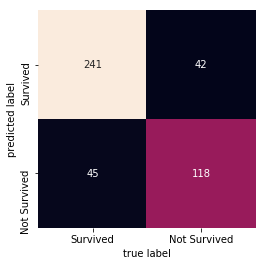

In [145]:
# Logistic model with full dataset 
from sklearn.linear_model import LogisticRegression
logReg1 = LogisticRegression()

train_set = train_data.drop('FamilySize', axis=1)
test_model(logReg1)

# High accuracy for train set, therefore we will go with building a model on test set. 
logReg1.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
LogReg1_model = logReg1.predict(test_data.drop('PassengerId', axis=1))
export_prediction(LogReg1_model)

Accuracy of 1st 50% of data: 0.8089887640449438
Accuracy of 2nd 50% of data: 0.8089887640449438.


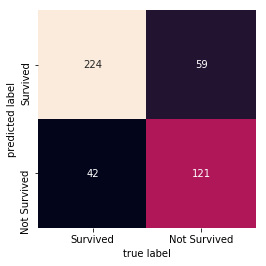

In [91]:
# LOGISTIC MODEL BUT ONLY SEX, AGEBuckets, Pclass, 
from sklearn.linear_model import LogisticRegression
logReg1 = LogisticRegression()

train_set = train_data.loc[:, ['Survived', 'Pclass', 'Parch', 'Embarked', 'Sex']]
test_set = test_data.loc[:, ['Pclass', 'Parch', 'Embarked', 'Sex']]

test_model(logReg1)

# High accuracy for train set, therefore we will go with building a model on test set. 
logReg1.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
LogReg1_model = logReg1.predict(test_set)
export_prediction(LogReg1_model)

Accuracy of 1st 50% of data: 0.8269662921348314
Accuracy of 2nd 50% of data: 0.8026905829596412.


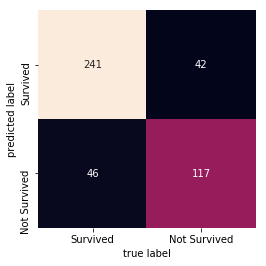

In [120]:
# LOGISTIC WITH SEX as vectorized, PClass as Vectorized, Parch as int
# Vectorize columns Pclass and Sex
train_vec = train_data.loc[:, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone']]
test_vec = test_data.loc[:, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone']]
categorical = train_vec.columns[[True,  True, True, True, True]]
train_vec = one_hot(train_vec, categorical)
test_vec = one_hot(test_vec, categorical)

# Create _set tables
train_set = pd.concat((train_data.loc[:, ['Survived', 'SibSp', 'Parch', 
                                          'Title', 'AgeBuckets']], train_vec), axis=1)
test_set = pd.concat((test_data.loc[:, ['SibSp', 'Parch',
                                          'Title', 'AgeBuckets']], test_vec), axis=1)

# Build model
test_model(logReg1)

# High accuracy for train set, therefore we will go with building a model on test set. 
logReg1.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
LogReg1_model = logReg1.predict(test_set)
export_prediction(LogReg1_model)

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of 1st 50% of data: 0.8202247191011236
Accuracy of 2nd 50% of data: 0.8004484304932735.


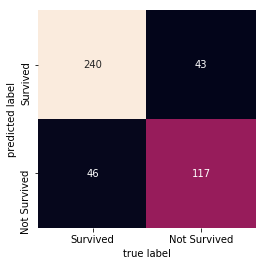

In [127]:
# Logistic model with full dataset and new hyperparameters
from sklearn.linear_model import LogisticRegression
logReg2 = LogisticRegression('l1', solver='saga')

train_set = train_data.drop('FamilySize', axis=1)
test_model(logReg2)

# High accuracy for train set, therefore we will go with building a model on test set. 
logReg2.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
LogReg2_model = logReg2.predict(test_data.drop('PassengerId', axis=1))
export_prediction(LogReg2_model)

An different approach to this problem would be creating dumy variables for all columns and then use RFE for automatically selecting which ones will give highest predicting capability. We tested 10 and 20 variables and received score of respectively: 
1. All dummies: 
* 10 best dummies: 0.78947
* 20 best dummies: X

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

Index(['Pclass_1', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_1', 'isCabin_0',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_4', 'Parch_5', 'Title_3', 'AgeBuckets_1',
       'AgeBuckets_6', 'AgeBuckets_8', 'AgeBuckets_9'],
      dtype='object')
Accuracy of 1st 50% of data: 0.8224719101123595
Accuracy of 2nd 50% of data: 0.804932735426009.


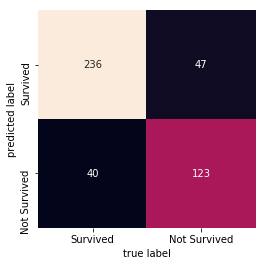

In [196]:
# LOGISTIC WITH SEX as vectorized, PClass as Vectorized, Parch as int
# Vectorize columns Pclass and Sex
train_vec = train_data.loc[:, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone', 'SibSp', 'Parch', 'Title', 'AgeBuckets']]
test_vec = test_data.loc[:, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone', 'SibSp', 'Parch', 'Title', 'AgeBuckets']]
categorical = train_vec.columns[[True,  True, True, True, True, True,  True, True, True]]
train_vec = one_hot(train_vec, categorical)
test_vec = one_hot(test_vec, categorical)

# Create _set tables
train_set = pd.concat((train_data.loc[:, ['Survived']], train_vec), axis=1)

# 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logReg1 = LogisticRegression()
rfe = RFE(logReg1, 20)
X = train_set.drop('Survived', axis=1)
rfe.fit(X, train_set['Survived'])

# columns to select
columns = X.loc[:, rfe.support_].columns
#columns = list(set(train_vec.columns).intersection(test_vec.columns))
train_set = pd.concat((train_set['Survived'], train_set.loc[:, columns]), axis=1)
test_set = test_set.loc[:, columns]
print(columns)

# Build model
test_model(logReg1)

# Fill nulls in test_set - This is not a problem since 0 means that dummy doesn't exist == Nan
test_set.fillna(0, inplace=True)

# High accuracy for train set, therefore we will go with building a model on test set. 
logReg1.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
LogReg1_model = logReg1.predict(test_set)
export_prediction(LogReg1_model)

### Support Vector Machines

This time I chose a quantitave approach for selecting features and hyperparameters. 

I've validated 50% of train set for each model built in loop. The loop was going through:
1. Both kernel methods: 'linear', 'rbf'  - I predict that the best results will be achieved by rbf method
* C ranging from 0.01 to 100 - lower C means higher (softer) margin. Because the data is very clean, I believe that lower C will perform better
* Starting all features, loop creates every possible combination of two or more features. 

The result of validation of each method was saved in 'accuracy_table' and using expert knowledge (mine!) I choose 10 models that are distinct to each other and had highest accuracy.



In [70]:
# FUNCTIONS: 

# Easy function used each time I want an empty accuracy_table:
def create_accuracy_table():
    return pd.DataFrame({'Model_name': [None],
                            'C_used': [None],
                            'Kernel': [None],
                            'List_of_col': [None],
                            'Avg_accuracy': [None]})

# Function used for testing accuracy of particular model:
def test_model(model_name, c, kernel, subset):
    # Devide train set into two subsets that will be predicted and evaluated.
    from sklearn.cross_validation import train_test_split
    X1, X2, y1, y2 = train_test_split(train_set.drop('Survived', axis=1), 
                                      train_set['Survived'],
                                      random_state=0,
                                      train_size=0.5)
    # RUN MODEL PREDICTION
    y2_model = model_name.fit(X1, y1).predict(X2)
    y1_model = model_name.fit(X2, y2).predict(X1)
    
    # CHECK ACCURACY and feed accuracy_table with mean accuracy on both sets.
    from sklearn.metrics import accuracy_score
    
    new_row = pd.DataFrame({'Model_name': [model_name],
                            'C_used': [c],
                            'Kernel': [kernel],
                            'List_of_col': [subset],
                            'Avg_accuracy': [np.mean((accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)))]})
    return pd.concat((accuracy_table, new_row), axis=0)

# Easy Function to generate list of Cs we want to test. 
def C_list():
    C1 = list(np.arange(0.001, 0.01, step=0.001))
    C2 = list(np.arange(0.01, 0.1, step=0.01))
    C3 = list(np.arange(0.1, 1, step=0.1))
    C4 = list(np.arange(1, 101, step=1))
    return C1 + C2 + C3 + C4

Run the prediction routine -->

In [104]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import SVC 
import itertools

columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'isCabin',
           'Title', 'isAlone', 'AgeBuckets']

accuracy_table = create_accuracy_table()
C = C_list()

for kernel in ['poly', 'rbf']:
    for c in C:
        model = SVC(kernel=kernel, C=c)
        for i in range(2, len(columns) + 1):
            for subset in itertools.combinations(columns, i):
                train_set = train_data.loc[:, ['Survived'] + list(subset)]
                test_set = test_data.loc[:, subset]            
                accuracy_table = test_model(model, c, kernel, subset) 

accuracy_table_top100 = accuracy_table.sort_values(['Avg_accuracy', 'C_used'], ascending=False).head(100)
accuracy_table_top100.reset_index(inplace=True, drop=True)
end = datetime.now()
'Execution time: {0} minutes.'.format(round((end - start).seconds/60, 2))

'Execution time: '

Building loops through parameters is time consuming. You could laso use Grid Search

Here it showed that for the full set, the best result gave C=1, gamma=0.1

It could be implemented in model above to search trhough different gamma

In [172]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

from sklearn.cross_validation import train_test_split
X1, X2, y1, y2 = train_test_split(train_set.drop('Survived', axis=1), 
                                      train_set['Survived'],
                                      random_state=0,
                                      train_size=0.5)

svc_param_selection(X1, y1, 10)

{'C': 1, 'gamma': 0.1}

Below table with accuracy results give us good indication regarding how the final model should be specified. 
Because the first 11 models give the same accuracy and consists on the same features, I will only choose the one with highest and lowest C.
The rest 8 selected models I tried to choose from highest Avg_accuracy and distinct columns. 

In [168]:
accuracy_table_top100.head(30)

,Avg_accuracy,C_used,List_of_col,Model_name
0,0.826032,16.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=16, cache_size=200, class_weight=None, c..."
1,0.826032,15.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=15, cache_size=200, class_weight=None, c..."
2,0.826032,14.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=14, cache_size=200, class_weight=None, c..."
3,0.826032,13.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=13, cache_size=200, class_weight=None, c..."
4,0.826032,12.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=12, cache_size=200, class_weight=None, c..."
5,0.826032,11.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=11, cache_size=200, class_weight=None, c..."
6,0.826032,10.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=10, cache_size=200, class_weight=None, c..."
7,0.826032,9.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=9, cache_size=200, class_weight=None, co..."
8,0.826032,8.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=8, cache_size=200, class_weight=None, co..."
9,0.826032,7.0,"(Pclass, Sex, Embarked, isCabin, AgeBuckets)","SVC(C=7, cache_size=200, class_weight=None, co..."


In [166]:
# create list of indexes (each index represent model we want to use as final one)
best_model_ix = [0, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22]

# from selected indexes I create tupple table with C and column names to specify each final model 
accuracy_table_tupples = []
for i in best_model_ix:
    c = accuracy_table_top100.iloc[i, 1]
    col = list(accuracy_table_top100.iloc[i, 2])
    accuracy_table_tupples.append((c, col))
    
# using two tupples, I create each SVC model and export it csv    
for i, (c, col) in enumerate(accuracy_table_tupples):
    model = SVC(kernel='rbf', C=c)
    model.fit(train_data.loc[:, col], train_data['Survived'])
    survived_prediction = model.predict(test_data.loc[:, col])
    model_name = 'SVC{0}_{1}_{2}'.format(i, col, c)
    export_prediction(survived_prediction, model_name)

## Random Forest

Instead of doing Decision Tree, I will start off with Random Forest as on average it gives better results. Next I will work on tuning the parameters and try to achieve better result than SVM method. If will not work I will go back to Decision trees and start again from there. 

In [37]:
def test_model(model_name, n, subset):
    # Devide train set into two subsets that will be predicted and evaluated.
    from sklearn.cross_validation import train_test_split
    X1, X2, y1, y2 = train_test_split(train_set.drop('Survived', axis=1), 
                                      train_set['Survived'],
                                      random_state=0,
                                      train_size=0.5)
    # RUN MODEL PREDICTION
    y2_model = model_name.fit(X1, y1).predict(X2)
    y1_model = model_name.fit(X2, y2).predict(X1)
    
    # CHECK ACCURACY and feed accuracy_table with mean accuracy on both sets.
    from sklearn.metrics import accuracy_score
    
    new_row = pd.DataFrame({'Model_name': [None],
                            'n_used': [n],
                            'List_of_col': [subset],
                            'Avg_accuracy': [np.mean((accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)))]})
    return pd.concat((accuracy_table, new_row), axis=0)

In [48]:
import datetime as dt
import itertools 

start = dt.datetime.now()

# First build up. All features, 100 tries, no tuning.
train_set = train_data.drop(['FamilySize'], axis=1)
test_set = test_data.drop(['PassengerId'], axis=1)


accuracy_table = pd.DataFrame({'Model_name': [None],
                            'n_used': [None],
                            'List_of_col': [None],
                            'Avg_accuracy': [None]})

from sklearn.ensemble import RandomForestClassifier

columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'isCabin',
           'Title', 'isAlone', 'AgeBuckets']

for i in range(2, len(columns) + 1):
    for subset in itertools.combinations(columns, i):
        for n in [25, 50, 100, 150]:
            model = RandomForestClassifier(n_estimators=n, random_state=0)
            train_set = train_data.loc[:, ['Survived'] + list(subset)]
            accuracy_table = test_model(model, n, subset)

accuracy_table_top100 = accuracy_table.sort_values(['Avg_accuracy', 'n_used'], ascending=False).head(100)
accuracy_table_top100.reset_index(inplace=True, drop=True)
end = dt.datetime.now()
'Execution time: {0} minutes.'.format(round((end - start).seconds/60, 2))

'Execution time: 21.27 minutes.'

In [45]:
accuracy_table_top100.iloc[[0, 1, 2, 5, 6, 9, 11, 13, 15, 16], :]


,Avg_accuracy,List_of_col,Model_name,n_used
0,0.813680,"(Pclass, Sex, Embarked, isCabin)",None,50
1,0.812579,"(Pclass, Sex, SibSp, Parch, Embarked, AgeBuckets)",None,50
2,0.812559,"(Pclass, Sex, Embarked, isCabin)",None,25
5,0.811455,"(Pclass, Sex, SibSp, Parch, Embarked, AgeBuckets)",None,150
6,0.811435,"(Pclass, Sex, Embarked)",None,150
9,0.811435,"(Pclass, Sex, Embarked)",None,25
11,0.808087,"(Pclass, Sex, SibSp, Embarked, isAlone, AgeBuc...",None,150
13,0.805845,"(Pclass, Sex, SibSp, Parch, Embarked, AgeBuckets)",None,25
15,0.805827,"(Pclass, Sex, Embarked, Title)",None,25
16,0.804731,"(Sex, SibSp, isCabin, AgeBuckets)",None,150


In [49]:
accuracy_table_top100.head(20)

,Avg_accuracy,List_of_col,Model_name,n_used
0,0.813680,"(Pclass, Sex, Embarked, isCabin)",None,50
1,0.812579,"(Pclass, Sex, SibSp, Parch, Embarked, AgeBuckets)",None,50
2,0.812559,"(Pclass, Sex, Embarked, isCabin)",None,25
3,0.812556,"(Pclass, Sex, Embarked, isCabin)",None,150
4,0.812556,"(Pclass, Sex, Embarked, isCabin)",None,100
5,0.811455,"(Pclass, Sex, SibSp, Parch, Embarked, AgeBuckets)",None,150
6,0.811435,"(Pclass, Sex, Embarked)",None,150
7,0.811435,"(Pclass, Sex, Embarked)",None,100
8,0.811435,"(Pclass, Sex, Embarked)",None,50
9,0.811435,"(Pclass, Sex, Embarked)",None,25


In [47]:
# create list of indexes (each index represent model we want to use as final one)
best_model_ix = [0, 1, 2, 5, 6, 9, 11, 13, 15, 16]

# from selected indexes I create tupple table with C and column names to specify each final model 
accuracy_table_tupples = []
for i in best_model_ix:
    n = accuracy_table_top100.iloc[i, 3]
    col = list(accuracy_table_top100.iloc[i, 1])
    accuracy_table_tupples.append((n, col))
    
# using two tupples, I create each SVC model and export it csv    
from sklearn.ensemble import RandomForestClassifier

for i, (n, col) in enumerate(accuracy_table_tupples):
    model = RandomForestClassifier(n_estimators=n, max_depth=None, min_samples_split=2, random_state=0)
    model.fit(train_data.loc[:, col], train_data['Survived'])
    survived_prediction = model.predict(test_data.loc[:, col])
    model_name = 'RandomForest{0}_{1}_{2}'.format(i, col, n)
    export_prediction(survived_prediction, model_name)

In [73]:
train_vec = train_data.loc[:, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone', 'SibSp', 'Parch', 'Title', 'AgeBuckets']]
categorical = train_vec.columns[[True,  True, True, True, True, True,  True, True, True]]
train_vec = one_hot(train_vec, categorical)
columns = train_vec.columns

# Create _set tables
train_set_all = pd.concat((train_data.loc[:, ['Survived']], train_vec), axis=1).copy()

for i in range(2, len(columns) + 1):
    for subset in itertools.combinations(columns, i):
        for n in [25, 50, 100, 150]:
            model = RandomForestClassifier(n_estimators=n, random_state=0)
            train_set = train_set_all.loc[:, ['Survived'] + list(subset)]
            accuracy_table = test_model(model, n, subset)

accuracy_table_top100 = accuracy_table.sort_values(['Avg_accuracy', 'n_used'], ascending=False).head(100)
accuracy_table_top100.reset_index(inplace=True, drop=True)
end = dt.datetime.now()
'Execution date: {0}.\nExecution time: {1} minutes.\nModels built: {2}.'.\
    format(end.strftime("%B %d, %Y"), round((end - start).seconds/60, 2), accuracy_table.shape[0])

KeyboardInterrupt: 

## K-Nearest Neighbours

Is a simple method which apply labels based on distance to k known points from training set. 
Because most of my data is categorical, I will use Hamming distance as parameter. 

Attack Plan:
1. Prepare train set, by building dummies variables from: Sex, Embarkment, Pclass, IsCabin and isAlone. The rest will stay int.
* Divide Train into train and test sets for future validation.
* Run through all combinations of variables and create k_nearest model. 
* Find 10 the best model and run GridSearch in order to find the best k 


In [59]:
train_set = one_hot(train_data, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone'])
train_set = pd.concat([train_data.loc[:, ['Survived', 'SibSp', 'Parch', 'Title', 'AgeBuckets']], train_set], axis=1)
test_set = one_hot(test_data, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone'])
test_set = pd.concat([test_data.loc[:, ['SibSp', 'Parch', 'Title', 'AgeBuckets']], test_set], axis=1)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import hamming
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from datetime import datetime as dt
import itertools 

start = dt.now()
accuracy_table = pd.DataFrame(columns=['Accuracy', 'Subset', 'k'])
train_set_all = train_set.copy()

def test_model(model_name, k, subset):

    X1, X2, y1, y2 = train_test_split(train_set.drop('Survived', axis=1), train_set['Survived'], random_state=0, train_size=0.5)

    y2_model = model_name.fit(X1, y1).predict(X2)
    y1_model = model_name.fit(X2, y2).predict(X1)

    new_row = pd.DataFrame({'Accuracy': [np.mean((accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)))],
                            'Subset': [subset],
                            'k': [k]})
    return pd.concat((accuracy_table, new_row), axis=0)

columns = train_set_all.drop('Survived', axis=1).columns

for i in range(2, len(train_set_all.columns) + 1):
    for subset in itertools.combinations(columns, i):
        for k in [1, 3, 5, 7, 9, 11, 13, 15]:
            knn = KNeighborsClassifier(n_neighbors=k, metric='hamming')
            train_set = train_set_all.loc[:, ['Survived'] + list(subset)]
            accuracy_table = test_model(knn, k, subset)

accuracy_table_top100 = accuracy_table.sort_values(['Accuracy', 'Subset', 'k'], ascending=False).head(100)
accuracy_table_top100.reset_index(inplace=True, drop=True)

end = dt.now()
print('Execution date: {0}.\nExecution time: {1} minutes.\nModels built: {2}.'.\
    format(end.strftime("%B %d, %Y"), round((end - start).seconds/60, 2), accuracy_table.shape[0]))

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Execution date: May 04, 2018.
Execution time: 548.6 minutes.
Models built: 524152.


In [66]:
train_set = one_hot(train_data, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone'])
train_set = pd.concat([train_data.loc[:, ['Survived', 'SibSp', 'Parch', 'Title', 'AgeBuckets']], train_set], axis=1)
test_set = one_hot(test_data, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone'])
test_set = pd.concat([test_data.loc[:, ['SibSp', 'Parch', 'Title', 'AgeBuckets']], test_set], axis=1)

# create list of indexes (each index represent model we want to use as final one)
best_model_ix = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# from selected indexes I create tupple table with C and column names to specify each final model 
accuracy_table_tupples = []
for i in best_model_ix:
    k = accuracy_table_top100.iloc[i, 2]
    col = list(accuracy_table_top100.iloc[i, 1])
    accuracy_table_tupples.append((k, col))
    
# using two tupples, I create each KNN model and export it csv    
from sklearn.neighbors import KNeighborsClassifier

for i, (k, col) in enumerate(accuracy_table_tupples):
    model = KNeighborsClassifier(n_neighbors=k, metric='hamming')
    model.fit(train_set.loc[:, col], train_set['Survived'])
    survived_prediction = model.predict(test_set.loc[:, col])
    model_name = 'KNN{0}_{1}_{2}'.format(i, col, k)
    export_prediction(survived_prediction, model_name)

In [63]:
accuracy_table_top100.head(5)

,Accuracy,Subset,k
0,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
1,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
2,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
3,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
4,0.821555,"(SibSp, AgeBuckets, Pclass_3, Sex_0, Sex_1, Em...",9


In [61]:
accuracy_table_top100.head(50)

,Accuracy,Subset,k
0,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
1,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
2,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
3,0.822668,"(SibSp, AgeBuckets, Pclass_1, Pclass_2, Pclass...",13
4,0.821555,"(SibSp, AgeBuckets, Pclass_3, Sex_0, Sex_1, Em...",9
5,0.821555,"(SibSp, AgeBuckets, Pclass_3, Sex_0, Sex_1, Em...",9
6,0.820434,"(SibSp, AgeBuckets, Pclass_3, Sex_0, Sex_1, Em...",9
7,0.820434,"(SibSp, AgeBuckets, Pclass_3, Sex_0, Sex_1, Em...",9
8,0.820434,"(SibSp, AgeBuckets, Pclass_3, Sex_0, Sex_1, Em...",9
9,0.820429,"(SibSp, AgeBuckets, Pclass_3, Sex_1, Embarked_...",13


In [62]:
accuracy_table_top100.to_csv(dir + 'accu_table.csv', index=False)

## XGBoosting - Gradient Boosting

Because of specific of this method, I will not try to find the specific set of features that maximizing prediction but instead I will let XGB decide. However, I still need to set up XGB hyperparameters and I will let GridSearchCV handle it. This way I can loop through all possible combinations and find the best set of hyperparameters. 

Because I am using dummies variable that are not the same in both training and test set, I need to first find the common set of features for both sets.

GridSearchCV also lets me specify CrossValidation and I will choose 10-fold with 60-30 ratio for finding the best model. 

As a result I will use 10 best combinations for final validation. 

In [67]:
# PREPARE DATA
train_set = one_hot(train_data, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone', 'SibSp', 'Parch', 'Title', 'AgeBuckets'])
train_set = pd.concat([train_data.loc[:, ['Survived']], train_set], axis=1)
test_set = one_hot(test_data, ['Pclass', 'Sex', 'Embarked', 'isCabin',  'isAlone', 'SibSp', 'Parch', 'Title', 'AgeBuckets'])

In [51]:
common = set(test_set.columns).intersection(train_set.columns)

train_set = pd.concat([train_set.loc[:, common], train_set['Survived']], axis=1)
test_set = test_set.loc[:, common]

#train_set.to_csv(dir + 'train_set', index=False)   # This was used for Kernel purpose
#test_set.to_csv(dir + 'test_set', index=False)     # This was used for Kernel purpose

40950

In [74]:
from datetime import datetime as dt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

def xgb_param_selection(X, y, nfolds):
    param_grid = {'max_depth': np.arange(1, 16), 
                  #'n_estimators': np.arange(10, 510, 10),
                  'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500],                 
                  'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                  'max_features': np.arange(2, len(test_set.columns) + 1)}
    xgb = GradientBoostingClassifier()
    grid_search = model_selection.GridSearchCV(xgb, param_grid, scoring='roc_auc', cv=nfolds)
    grid_result = grid_search.fit(X, y)
    return grid_result

start = dt.now()

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)
grid_result = xgb_param_selection(train_set.drop('Survived', axis=1), train_set['Survived'], cv_split)

end = dt.now()
print('Execution date: {0}.\nExecution time: {1} minutes.'.format(end.strftime("%B %d, %Y"), round((end - start).seconds/60, 2)))

In [ ]:
end = dt.now()
print('Execution date: {0}.\nExecution time: {1} minutes.\nModels built: {2}.'.\
    format(end.strftime("%B %d, %Y"), round((end - start).seconds/60, 2), accuracy_table.shape[0]))

## Final Prediction

So far we have created rougly 50 models with Survival predictions. In general the combine prediction power of all of them should be better than predicting power of individual method. I will test this assumption here, in 3 ways:
1. I will use all 50 models. 
* I will only use best one of each type
* I will use only best 10 from kaggle eval site. 

In [22]:
# All 50 into new one:
prediction = pd.read_csv('C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\data\\test.csv', usecols=['PassengerId'])

# Add all other files:
import os
path = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions'
for filename in os.listdir(path):
    new_file = pd.read_csv(path + '\\' + filename, usecols=['Survived'])
    new_file.columns = [filename]
    prediction = pd.concat([prediction, new_file], axis=1)
# Predict Survivals
prediction['Mean'] = prediction.drop('PassengerId', axis=1).mean(axis=1)
prediction.loc[:, ['PassengerId', 'Mean']]
prediction['Survived'] = np.where(prediction['Mean'] > 0.5, 1, 0)
prediction.loc[:, ['PassengerId', 'Survived']]
# Export to file
prediction.loc[:, ['PassengerId', 'Survived']].\
    to_csv('C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions\\Combined_All.csv', index=False)

In [25]:
# The best from each type:
prediction = pd.read_csv('C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\data\\test.csv', usecols=['PassengerId'])

lista = ["KNN0_['SibSp', 'AgeBuckets', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Embarked_2', 'Embarked_3', 'isCabin_0', 'isCabin_1', 'isAlone_1']_13.csv",
       "SVC0_['Pclass', 'Sex', 'Embarked', 'isCabin', 'AgeBuckets']_16.0.csv",
       "XGB0_3_25_0.2.csv",
       "RandomForest0_['Pclass', 'Sex', 'Embarked', 'isCabin']_50.csv"]
path = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions\\'
for file in lista:
    new_file = pd.read_csv(path + file, usecols=['Survived'])
    new_file.columns = ['col']
    prediction = pd.concat([prediction, new_file], axis=1)
# Predict Survivals
prediction['Mean'] = prediction.drop('PassengerId', axis=1).mean(axis=1)
prediction.loc[:, ['PassengerId', 'Mean']]
prediction['Survived'] = np.where(prediction['Mean'] > 0.5, 1, 0)
prediction.loc[:, ['PassengerId', 'Survived']]
# Export to file
prediction.loc[:, ['PassengerId', 'Survived']].\
    to_csv('C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions\\Combined_Each_Best.csv', index=False)

In [16]:
# The best 5 from Kaggle:
prediction = pd.read_csv('C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\data\\test.csv', usecols=['PassengerId'])

lista = ["SVC9_['Sex', 'SibSp', 'Parch', 'Embarked', 'isCabin', 'Title', 'AgeBuckets']_0.8.csv",
         "SVC10_['Sex', 'SibSp', 'Parch', 'isCabin', 'isAlone', 'AgeBuckets']_0.6.csv",
         "SVC7_['Sex', 'SibSp', 'Parch', 'isCabin', 'isAlone', 'AgeBuckets']_0.4.csv",
         "SVC8_['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'isCabin', 'Title', 'AgeBuckets']_0.9.csv",
         "SVC2_['Sex', 'SibSp', 'Parch', 'isCabin', 'Title', 'isAlone', 'AgeBuckets']_2.0.csv"]
path = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions\\'
for file in lista:
    new_file = pd.read_csv(path + file, usecols=['Survived'])
    new_file.columns = ['col']
    prediction = pd.concat([prediction, new_file], axis=1)
# Predict Survivals
prediction['Mean'] = prediction.drop('PassengerId', axis=1).mean(axis=1)
prediction.loc[:, ['PassengerId', 'Mean']]
prediction['Survived'] = np.where(prediction['Mean'] > 0.5, 1, 0)
prediction.loc[:, ['PassengerId', 'Survived']]
# Export to file
prediction.loc[:, ['PassengerId', 'Survived']].\
    to_csv('C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project1_Titanic\\predictions\\combined\\Combined_Kaggle_5Best.csv', index=False)

0      0.000000
1      0.366667
2      0.000000
3      0.000000
4      0.466667
5      0.000000
6      1.000000
7      0.000000
8      0.966667
9      0.000000
10     0.000000
11     0.000000
12     0.983333
13     0.000000
14     0.983333
15     0.983333
16     0.016667
17     0.000000
18     0.450000
19     0.600000
20     0.200000
21     0.450000
22     0.966667
23     0.233333
24     0.983333
25     0.000000
26     1.000000
27     0.000000
28     0.016667
29     0.000000
         ...   
388    0.000000
389    0.016667
390    0.116667
391    1.000000
392    0.416667
393    0.000000
394    0.000000
395    0.983333
396    0.000000
397    1.000000
398    0.000000
399    0.000000
400    1.000000
401    0.000000
402    1.000000
403    0.016667
404    0.500000
405    0.166667
406    0.000000
407    0.400000
408    1.000000
409    0.683333
410    1.000000
411    1.000000
412    0.416667
413    0.000000
414    1.000000
415    0.000000
416    0.000000
417    0.000000
Length: 418, dtype: floa